In [6]:
import wandb

api = wandb.Api()
qwen14B_warmup_run = api.run("nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end") # 1 epoch 42 steps
qwen14B_first_run = api.run("snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end") # 4 epoch 168 steps
qwen14B_filter_run = api.run("nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end") # 5 epoch 150 steps
# print the length of all records
print(f"length of qwen14B_warmup_run.history(): {len(qwen14B_warmup_run.history())}")
print(f"length of qwen14B_first_run.history(): {len(qwen14B_first_run.history())}")
print(f"length of qwen14B_filter_run.history(): {len(qwen14B_filter_run.history())}")

length of qwen14B_warmup_run.history(): 332
length of qwen14B_first_run.history(): 280
length of qwen14B_filter_run.history(): 166


length of qwen14B_warmup_run.history(): 332
length of qwen14B_first_run.history(): 280
length of qwen14B_filter_run.history(): 166


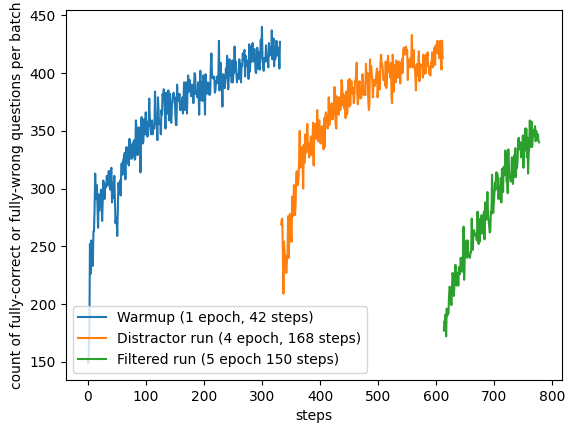

In [18]:
# draw batch solve equal
import wandb
import matplotlib.pyplot as plt

api = wandb.Api()

# 三个 run
qwen14B_warmup_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end"
)  # 1 epoch 42 steps
qwen14B_first_run = api.run(
    "snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end"
)  # 4 epoch 168 steps
qwen14B_filter_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end"
)  # 5 epoch 150 steps

# 打印长度
print(f"length of qwen14B_warmup_run.history(): {len(qwen14B_warmup_run.history())}")
print(f"length of qwen14B_first_run.history(): {len(qwen14B_first_run.history())}")
print(f"length of qwen14B_filter_run.history(): {len(qwen14B_filter_run.history())}")

# 提取数据并画图
y_warmup = qwen14B_warmup_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup)), y_warmup, label="Warmup (1 epoch, 42 steps)")

y_first = qwen14B_first_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup), len(y_warmup) + len(y_first)), y_first,
         label="Distractor run (4 epoch, 168 steps)")

y_filter = qwen14B_filter_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup) + len(y_first),
               len(y_warmup) + len(y_first) + len(y_filter)),
         y_filter,
         label="Filtered run (5 epoch 150 steps)")

# 坐标轴和图例
plt.xlabel("steps")
plt.ylabel("count of fully-correct or fully-wrong questions per batch")
plt.legend()
# plt.title("Qwen2.5-7B Solve Equal Across Runs")

plt.show()


length of qwen14B_warmup_run.history(): 332
length of qwen14B_first_run.history(): 280
length of qwen14B_filter_run.history(): 166


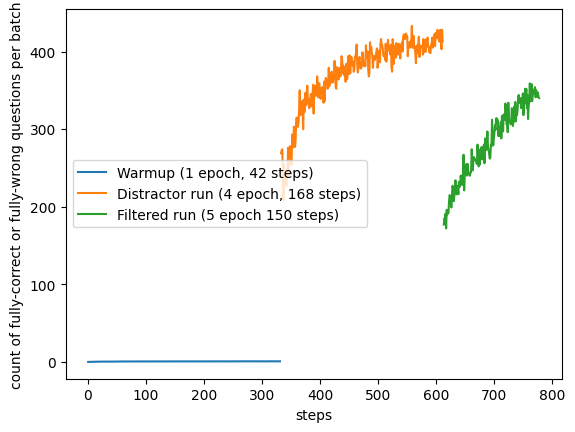

In [15]:
# draw batch solve equal
import wandb
import matplotlib.pyplot as plt
import numpy as np

api = wandb.Api()

# 三个 run
qwen14B_warmup_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end"
)  # 1 epoch 42 steps
qwen14B_first_run = api.run(
    "snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end"
)  # 4 epoch 168 steps
qwen14B_filter_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end"
)  # 5 epoch 150 steps

# 打印长度
print(f"length of qwen14B_warmup_run.history(): {len(qwen14B_warmup_run.history())}")
print(f"length of qwen14B_first_run.history(): {len(qwen14B_first_run.history())}")
print(f"length of qwen14B_filter_run.history(): {len(qwen14B_filter_run.history())}")

# 提取数据并画图
y_warmup = (qwen14B_warmup_run.history()["critic/returns/mean"].tolist())
batchsize=512
num_correct = np.array(qwen14B_warmup_run.history()['critic/num_all_right'].tolist())
num_wrong = np.array(qwen14B_warmup_run.history()['critic/num_all_wrong'].tolist())
y_warmup = (y_warmup*(batchsize-num_wrong-num_correct) +num_correct)/batchsize
plt.plot(range(len(y_warmup)), y_warmup, label="Warmup (1 epoch, 42 steps)")

y_first = qwen14B_first_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup), len(y_warmup) + len(y_first)), y_first,
         label="Distractor run (4 epoch, 168 steps)")

y_filter = qwen14B_filter_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup) + len(y_first),
               len(y_warmup) + len(y_first) + len(y_filter)),
         y_filter,
         label="Filtered run (5 epoch 150 steps)")

# 坐标轴和图例
plt.xlabel("steps")
plt.ylabel("count of fully-correct or fully-wrong questions per batch")
plt.legend()
# plt.title("Qwen2.5-7B Solve Equal Across Runs")

plt.show()


len(warmup)=331, len(first)=279, len(filter)=165


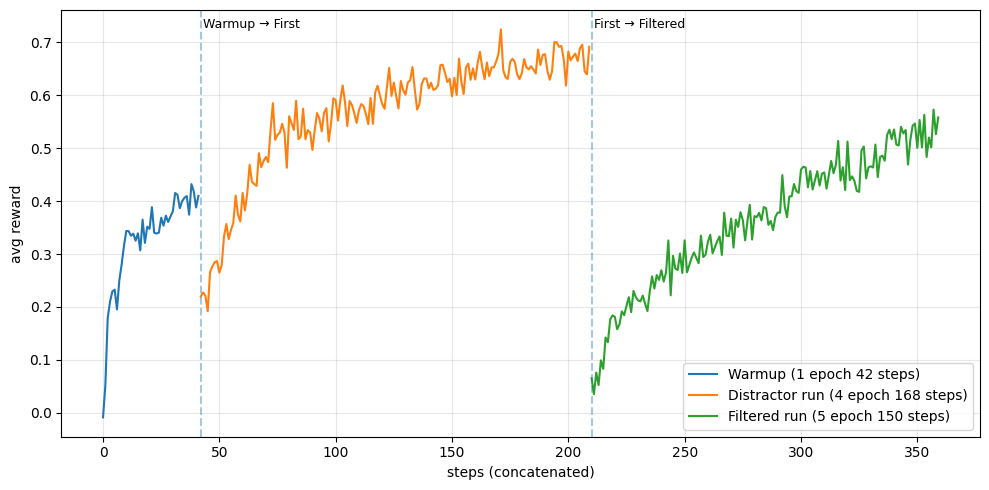

In [23]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

api = wandb.Api()

# 三个 run
qwen14B_warmup_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end"
)  # 1 epoch ~42 steps
qwen14B_first_run = api.run(
    "snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end"
)  # 4 epoch ~168 steps
qwen14B_filter_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end"
)  # max ~151 steps

# 批大小（如三段一致用同一个；若不一致可分别设定）
BATCHSIZE = 512

def fixed_reward_series(run, batchsize=BATCHSIZE):
    """Compute fixed mean reward for a run:
       (returns_mean * (batchsize - num_wrong - num_correct) + num_correct) / batchsize
    """
    # 一次性取所需字段，减少 API 调用
    hist = run.history(keys=[
        "critic/returns/mean",
        "critic/num_all_right",
        "critic/num_all_wrong",
    ])

    returns_mean = np.array(hist.get("critic/returns/mean", []), dtype=float)
    num_right    = np.array(hist.get("critic/num_all_right", []), dtype=float)
    num_wrong    = np.array(hist.get("critic/num_all_wrong", []), dtype=float)

    # 对齐长度（wandb.history 可能字段长度不一致）
    L = min(len(returns_mean), len(num_right), len(num_wrong))
    returns_mean = returns_mean[:L]
    num_right    = num_right[:L]
    num_wrong    = num_wrong[:L]

    # 计算 fixed reward
    fixed = (returns_mean * (batchsize - num_wrong - num_right) + num_right) / batchsize
    return fixed

# 计算三段 fixed rewards
y_warmup = fixed_reward_series(qwen14B_warmup_run, BATCHSIZE) # 1 epoch 42 steps
y_first  = fixed_reward_series(qwen14B_first_run,  BATCHSIZE) # 4 epoch 168 steps
y_filter = fixed_reward_series(qwen14B_filter_run, BATCHSIZE) # 5 epoch 150 steps

print(f"len(warmup)={len(y_warmup)}, len(first)={len(y_first)}, len(filter)={len(y_filter)}")

# 画图（首尾相接）
plt.figure(figsize=(10, 5))

x0_start, x0_end = 0, 42
plt.plot(range(x0_start, x0_end), y_warmup[1:x0_end-x0_start+1], label="Warmup (1 epoch 42 steps)")

x1_start, x1_end = x0_end, x0_end + 168
plt.plot(range(x1_start, x1_end), y_first[1:x1_end-x1_start+1], label="Distractor run (4 epoch 168 steps)")

x2_start, x2_end = x1_end, x1_end + 150
plt.plot(range(x2_start, x2_end), y_filter[1:x2_end-x2_start+1], label="Filtered run (5 epoch 150 steps)")

# 分段竖线与标注
for xpos, name in [(x0_end, "Warmup → First"), (x1_end, "First → Filtered")]:
    plt.axvline(x=xpos, linestyle="--", alpha=0.4)
    plt.text(xpos + 1, plt.gca().get_ylim()[1]*0.98, name, fontsize=9, va="top")

plt.xlabel("steps (concatenated)")
plt.ylabel("avg reward")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()